# Linear Regression : The intuitive idea

Why?
- Marketing trend
-

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read anscombe dataset:
anscombe_data=pd.read_csv("anscombe.csv")
anscombe_data

,Unnamed: 0,x1,x2,x3,x4,y1,y2,y3,y4
0,1,10,10,10,8,8.04,9.14,7.46,6.58
1,2,8,8,8,8,6.95,8.14,6.77,5.76
2,3,13,13,13,8,7.58,8.74,12.74,7.71
3,4,9,9,9,8,8.81,8.77,7.11,8.84
4,5,11,11,11,8,8.33,9.26,7.81,8.47
5,6,14,14,14,8,9.96,8.10,8.84,7.04
6,7,6,6,6,8,7.24,6.13,6.08,5.25
7,8,4,4,4,19,4.26,3.10,5.39,12.50
8,9,12,12,12,8,10.84,9.13,8.15,5.56
9,10,7,7,7,8,4.82,7.26,6.42,7.91


In [11]:
#Checking the correlation and scatter plot
x=anscombe_data['x1']
y=anscombe_data["y1"]
print(x)
print(y)

0     10
1      8
2     13
3      9
4     11
5     14
6      6
7      4
8     12
9      7
10     5
Name: x1, dtype: int64
0      8.04
1      6.95
2      7.58
3      8.81
4      8.33
5      9.96
6      7.24
7      4.26
8     10.84
9      4.82
10     5.68
Name: y1, dtype: float64


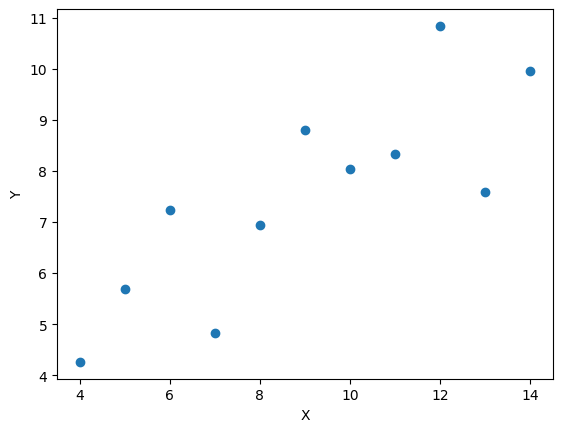

In [12]:
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [13]:
a=2.0
b=0.7 
#calculate residual=y-y^
residual=y-(a+b*x)
residual

0    -0.96
1    -0.65
2    -3.52
3     0.51
4    -1.37
5    -1.84
6     1.04
7    -0.54
8     0.44
9    -2.08
10    0.18
dtype: float64

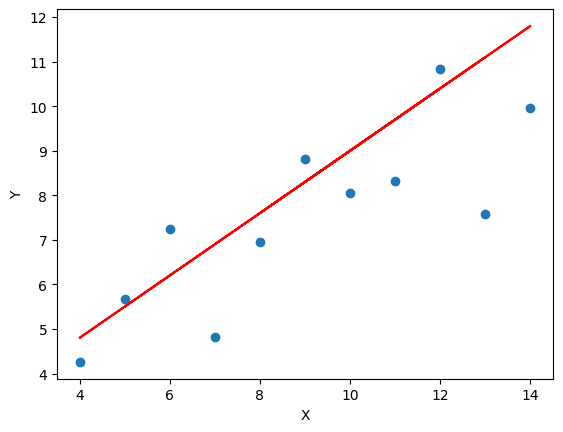

In [14]:
plt.scatter(x,y)
plt.plot(x,a+b*x,color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [16]:
from matplotlib.patches import Rectangle

/var/folders/tg/lmwvqpj52v571r3rpp5rs_900000gn/T/ipykernel_2601/447383830.py:8: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  rect=Rectangle((x[i],y[i]),residual[i],residual[i],


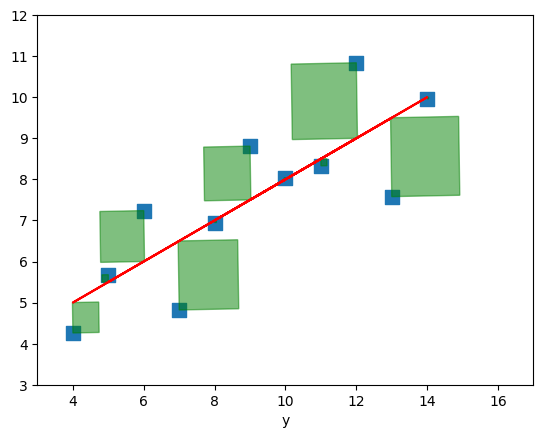

In [46]:
b=0.5
a=np.mean(y)-b*np.mean(x)
residual=(a+b*x)-y
fig,ax=plt.subplots()
ax.scatter(x,y,marker='s',s=100)
ax.plot(x,a+b*x,color='red')
for i in range (len(x)):
    rect=Rectangle((x[i],y[i]),residual[i],residual[i],
        fill:=True,
        color='green',
        alpha=0.5)
    ax.add_patch(rect)

ax.set_xlabel('x')
ax.set_xlabel('y')
ax.set_xlim(3,17)
ax.set_ylim(3,12)
plt.show()

In [47]:
# Prediction must lie under the green boxes which is the calculation of the residual


/var/folders/tg/lmwvqpj52v571r3rpp5rs_900000gn/T/ipykernel_2601/2717586450.py:9: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  rect=Rectangle((x[i],y[i]),residual[i],residual[i],


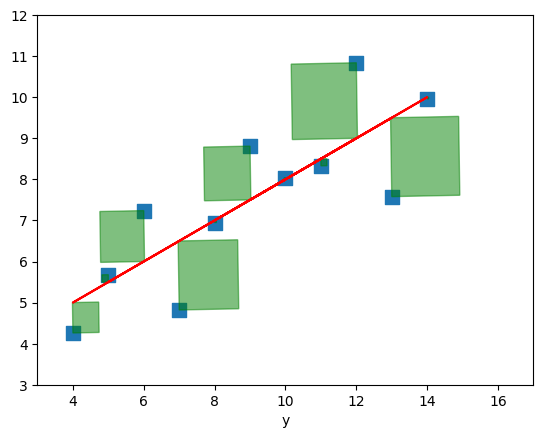

In [48]:
#Calculate the slope of B
b=np.sum((x-np.mean(x))*(y-np.mean(y))/np.sum((x-np.mean(x))**2))
a=np.mean(y)-b*np.mean(x)
residual=(a+b*x)-y
fig,ax=plt.subplots()
ax.scatter(x,y,marker='s',s=100)
ax.plot(x,a+b*x,color='red')
for i in range (len(x)):
    rect=Rectangle((x[i],y[i]),residual[i],residual[i],
        fill:=True,
        color='green',
        alpha=0.5)
    ax.add_patch(rect)

ax.set_xlabel('x')
ax.set_xlabel('y')
ax.set_xlim(3,17)
ax.set_ylim(3,12)
plt.show()

In [49]:
cars=pd.read_csv("cars.csv")
cars

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16
5,6,9,10
6,7,10,18
7,8,10,26
8,9,10,34
9,10,11,17


In [50]:
summary=cars.describe()
summary

,Unnamed: 0,speed,dist
count,50.00000,50.000000,50.000000
mean,25.50000,15.400000,42.980000
std,14.57738,5.287644,25.769377
min,1.00000,4.000000,2.000000
25%,13.25000,12.000000,26.000000
50%,25.50000,15.000000,36.000000
75%,37.75000,19.000000,56.000000
max,50.00000,25.000000,120.000000


In [56]:
x=cars["speed"]
y=cars["dist"]
x.describe()

count    50.000000
mean     15.400000
std       5.287644
min       4.000000
25%      12.000000
50%      15.000000
75%      19.000000
max      25.000000
Name: speed, dtype: float64

In [57]:
y.describe()

count     50.000000
mean      42.980000
std       25.769377
min        2.000000
25%       26.000000
50%       36.000000
75%       56.000000
max      120.000000
Name: dist, dtype: float64

In [58]:
correlation=x.corr(y)
if correlation >0:
    description="There is +ve correlation between speed and stopping distance "
elif correlation <0:
    description="There is -ve correlation between speed and stopping distance "
else:
    description="There is NO correlation between speed and stopping distance "
print("Correlation coeff: ",correlation)
print("Relationship description: ",description)



Correlation coeff:  0.8068949006892103
Relationship description:  There is +ve correlation between speed and stopping distance 


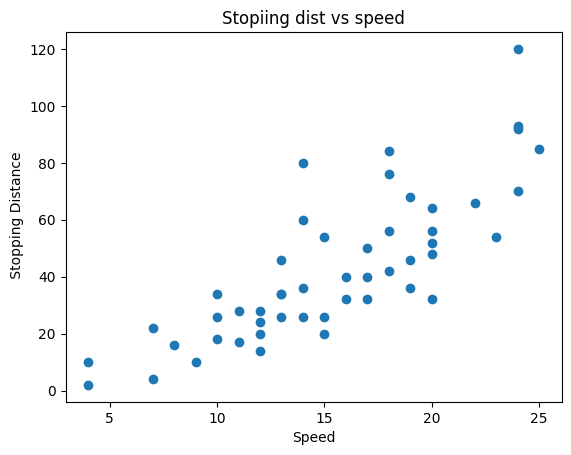

In [63]:
plt.scatter(x,y)
plt.title("Stopiing dist vs speed")
plt.xlabel("Speed")
plt.ylabel(" Stopping Distance")
plt.show()

/var/folders/tg/lmwvqpj52v571r3rpp5rs_900000gn/T/ipykernel_2601/2862804897.py:9: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  rect=Rectangle((x[i],y[i]),residual[i],residual[i],


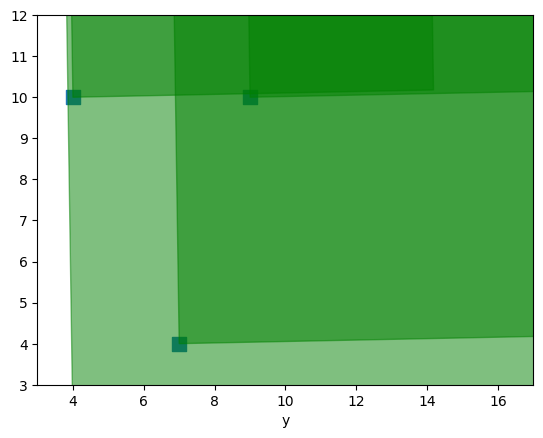

In [68]:
b=np.sum((x-np.mean(x))*(y-np.mean(y))/np.sum((x-np.mean(x))**2))
a=np.mean(y)-b*np.mean(x)
residual=(a+b*x)-y
fig,ax=plt.subplots()
ax.scatter(x,y,marker='s',s=100)
ax.plot(x,a+b*x,color='red')
for i in range (len(x)):
    rect=Rectangle((x[i],y[i]),residual[i],residual[i],
        fill:=True,
        color='green',
        alpha=0.5)
    ax.add_patch(rect)

ax.set_xlabel('x')
ax.set_xlabel('y')
ax.set_xlim(3,17)
ax.set_ylim(3,12)
plt.show()

In [125]:
# own data:(
x=np.random.randint(0,10,size=(3,4))
x

array([[0, 0, 4, 6],
       [9, 1, 9, 1],
       [8, 4, 6, 0]])

In [129]:
y=np.random.randint(0,15,size=(3,4))
y

array([[ 3, 13, 12,  3],
       [12,  6,  5,  0],
       [12,  2,  9, 10]])

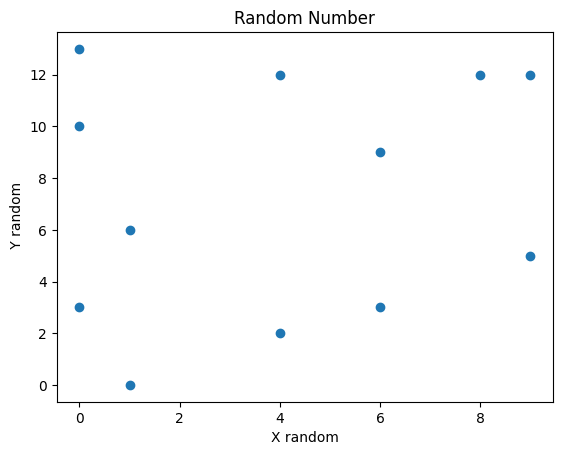

In [132]:
plt.scatter(x,y)
plt.title("Random Number")
plt.xlabel("X random")
plt.ylabel(" Y random")
plt.show()

In [159]:
import statsmodels.api as sm
from plotnine import *

In [151]:
marketing =pd.read_csv("marketing.csv")
marketing
marketing.head(7)

,Unnamed: 0,youtube,facebook,newspaper,sales
0,1,276.12,45.36,83.04,26.52
1,2,53.40,47.16,54.12,12.48
2,3,20.64,55.08,83.16,11.16
3,4,181.80,49.56,70.20,22.20
4,5,216.96,12.96,70.08,15.48
5,6,10.44,58.68,90.00,8.64
6,7,69.00,39.36,28.20,14.16


In [152]:
#Asuming you have a dataframe name data woth colkumns sales and youtube
model=sm.OLS.from_formula('sales ~ youtube',marketing)
results=model.fit()
#calculate predicted vaues and residuals
marketing['Predicted']=results.predict(marketing)
marketing['Residuals']=marketing['sales']-marketing['Predicted']

In [153]:
marketing

,Unnamed: 0,youtube,facebook,newspaper,sales,Predicted,Residuals
0,1,276.12,45.36,83.04,26.52,21.564929,4.955071
1,2,53.40,47.16,54.12,12.48,10.977569,1.502431
2,3,20.64,55.08,83.16,11.16,9.420269,1.739731
3,4,181.80,49.56,70.20,22.20,17.081273,5.118727
4,5,216.96,12.96,70.08,15.48,18.752662,-3.272662
...,...,...,...,...,...,...,...
195,196,45.84,4.44,16.56,9.12,10.618192,-1.498192
196,197,113.04,5.88,9.72,11.64,13.812654,-2.172654
197,198,212.40,11.16,7.68,15.36,18.535895,-3.175895
198,199,340.32,50.40,79.44,30.60,24.616782,5.983218


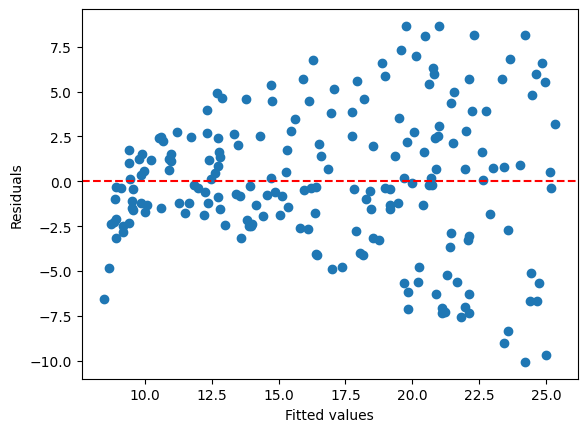

In [157]:
plt.scatter(marketing["Predicted"],marketing["Residuals"])
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

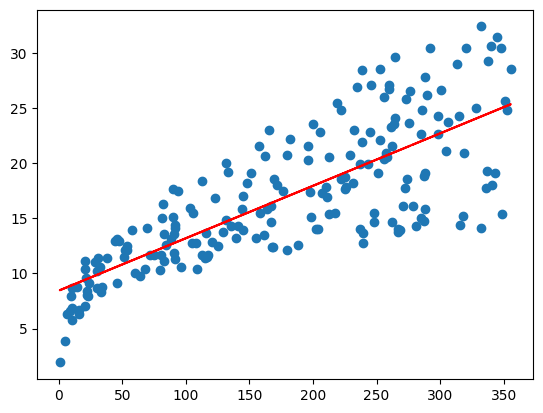

In [162]:
model=sm.OLS(marketing['sales'],sm.add_constant(marketing['youtube']))
results=model.fit()
#calculate predicted vaues and residuals
plt.scatter(marketing['youtube'],marketing['sales'])
plt.plot(marketing['youtube'],results.fittedvalues,color='red')
plt.show()

In [164]:
model=sm.OLS(marketing['sales'],sm.add_constant(marketing['youtube']))
results=model.fit()
#summary of the L-R model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           1.47e-42
Time:                        17:07:04   Log-Likelihood:                -555.51
No. Observations:                 200   AIC:                             1115.
Df Residuals:                     198   BIC:                             1122.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4391      0.549     15.360      0.0

In [165]:
model=sm.OLS(marketing['sales'],sm.add_constant(marketing['facebook']))
results=model.fit()
#summary of the L-R model
print(results.summary())        #F statistic will be used in ML
# R-squared in data analysis

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           4.35e-19
Time:                        17:07:22   Log-Likelihood:                -609.80
No. Observations:                 200   AIC:                             1224.
Df Residuals:                     198   BIC:                             1230.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1740      0.675     16.542      0.0

In [166]:
model=sm.OLS(marketing['sales'],sm.add_constant(marketing['newspaper']))
results=model.fit()
#summary of the L-R model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 19 Jun 2023   Prob (F-statistic):            0.00115
Time:                        17:09:22   Log-Likelihood:                -644.80
No. Observations:                 200   AIC:                             1294.
Df Residuals:                     198   BIC:                             1300.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8217      0.746     19.876      0.0